In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns




import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [8]:
tt = pd.read_csv('./data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20211031.csv', encoding='euckr')
tt.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [9]:
tt.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    471
dtype: int64

In [10]:
tt.dropna(inplace=True)
tt.isna().sum()

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [11]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 6204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         5734 non-null   object
 1   규모구분        5734 non-null   object
 2   연도          5734 non-null   int64 
 3   월           5734 non-null   int64 
 4   분양가격(제곱미터)  5734 non-null   object
dtypes: int64(2), object(3)
memory usage: 268.8+ KB


In [12]:
tt['분양가격(제곱미터)'] = tt['분양가격(제곱미터)'].astype(str).apply(lambda x: x.strip(' ').replace(',','').replace('-',''))

In [13]:
tt[tt['분양가격(제곱미터)']==''] = np.nan
tt.dropna(inplace =True)
tt

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015.0,10.0,5841
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879
...,...,...,...,...,...
6199,경남,전용면적 102제곱미터초과,2021.0,10.0,3599
6200,제주,모든면적,2021.0,10.0,6860
6202,제주,전용면적 60제곱미터초과 85제곱미터이하,2021.0,10.0,6787
6203,제주,전용면적 85제곱미터초과 102제곱미터이하,2021.0,10.0,5924


In [14]:
tt['분양가격(제곱미터)'] = tt['분양가격(제곱미터)'].astype(float)

In [15]:
# 지역별 평당 분양가격

tt['평당분양가격'] = tt['분양가격(제곱미터)'] * 3.3
tt.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015.0,10.0,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879.0,19400.7


<AxesSubplot:xlabel='지역명'>

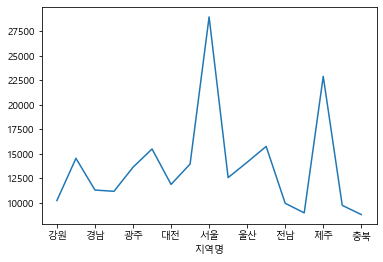

In [16]:
tt[tt.연도  ==2021].groupby('지역명')['평당분양가격'].mean().plot()

In [17]:
# 2021년도의 지역별 분양가 평균
tt.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015.0,10.0,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879.0,19400.7


In [20]:
tt.groupby('지역명','tt.연도==2021')['평당분양가격'].mean()

지역명
강원     8605.250142
경기    13791.676438
경남     9802.436798
경북     9012.194169
광주    11110.364262
대구    13037.493539
대전    10559.694444
부산    12557.557808
서울    25293.933241
세종    10340.986452
울산    11252.015546
인천    12959.529640
전남     8199.387640
전북     8031.167036
제주    12967.159184
충남     8580.228902
충북     7907.836364
Name: 평당분양가격, dtype: float64